# Task 2 RNN and LSTM

In [ ]:
import os

folder_path = "/content/news_category.csv"


if os.path.exists(folder_path):
    print("Folder exists!")
else:
    print("Folder not found. Check the path.")


Folder exists!


## Load Dataset

In [ ]:
import pandas as pd

In [ ]:
# data = pd.read_csv('/content/drive/My Drive/image_ai/NewsCategoryDataset/NewsCategoryDataset/news_category.csv')
data = pd.read_csv('/content/news_category.csv')

## Preprocess Dataset

In [ ]:
import pandas as pd
import numpy as np
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

### Remove URL & Unwanted Characters

In [ ]:
def remove_urls(text):
  """
  This function will try to remove URL present in out dataset and replace it with space using regex library.
  Input Args:
  text: strings of text that may contain URLs.
  Output Args:
  text: URLs replaces with text
  """
  url_pattern = re.compile(r'https?://\S+|www\.\S+')
  return url_pattern.sub(r'', text)

def remove_emoji(string):
  """
  This function will replace the emoji in string with whitespace
  """
  emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
  return emoji_pattern.sub(r' ', string)

def removeunwanted_characters(document):
  """
  This function will remove all the unwanted characters from the input dataset.
  Input Args:
  documet: A text data to be cleaned.
  Return:
  A cleaned document.
  """
  # remove user mentions
  document = re.sub("@[A-Za-z0-9_]+"," ", document)
  # remove hashtags
  document = re.sub("#[A-Za-z0-9_]+","", document)
  # remove punctuation
  document = re.sub("[^0-9A-Za-z ]", "" , document)
  #remove emojis
  document = remove_emoji(document)
  # remove double spaces
  document = document.replace('  ',"")
  return document.strip()


### Remove Puncuations

In [ ]:
from nltk.tokenize import RegexpTokenizer

from nltk.tokenize import RegexpTokenizer

def remove_punct(text):
  """
  This function removes the punctutations present in our text data.
  Input Args:
  text: text data.
  Returns:
  text: cleaned text.
  """
  tokenizer = RegexpTokenizer(r"\w+")
  lst=tokenizer.tokenize(' '.join(text))
  return lst

### Stopwords Removal

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('english'))
custom_stopwords = ['@', 'RT']
stop_words.update(custom_stopwords)

def remove_stopwords(text_tokens):
  """
  This function removes all the stopwords present in out text tokens.
  Input Args:
  text_tokens: tokenize input of our datasets.
  Returns:
  result_tokens: list of token without stopword.
  """

  result_tokens = []
  for token in text_tokens:
    if token not in stop_words:
       result_tokens.append(token)
  return result_tokens

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Lemmetization

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize,pos_tag
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

def lemmatization(token_text):
  """
  This function performs the lemmatization operations as explained above.
  Input Args:
  token_text: list of tokens.
  Returns:
  lemmatized_tokens: list of lemmatized tokens.
  """
  lemma_tokens = []
  wordnet = WordNetLemmatizer()
  lemmatized_tokens = [wordnet.lemmatize(token, pos = 'v') for token in token_text]

  return lemmatized_tokens



[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Stemming

In [ ]:
from nltk.stem import PorterStemmer

def stemming(text):
  """
  This function performs stemming operations.
  Input Args:
  token_text: list of tokenize text.
  Returns:
  stemm_tokes: list of stemmed tokens.
  """
  porter = PorterStemmer()
  stemm_tokens = []
  for word in text:
    stemm_tokens.append(porter.stem(word))
  return stemm_tokens

### Convert to lowercase

In [ ]:
def lower_order(text):
  """
  This function converts all the text in input text to lower order.
  Input Args:
  token_text : input text.
  Returns:
  small_order_text : text converted to small/lower order.
  """
  small_order_text = text.lower()
  return small_order_text

# Test:
sample_text = "This Is some Normalized TEXT"
sample_small = lower_order(sample_text)
print(sample_small)

this is some normalized text


### Data Cleaning Pipiline Function

In [ ]:
def text_cleaning_pipeline(dataset, rule = "lemmatize"):
  """
  This...
  """
  # Convert the input to small/lower order.
  data = lower_order(dataset)
  # Remove URLs
  data = remove_urls(data)
  # Remove emojis
  data = remove_emoji(data)
  # Remove all other unwanted characters.
  data = removeunwanted_characters(data)
  # Create tokens.
  tokens = data.split()
  # Remove stopwords:
  tokens = remove_stopwords(tokens)
  # Stemming or Lemmatization
  if rule == "lemmatize":
    tokens = lemmatization(tokens)
  elif rule == "stem":
    tokens = stemming(tokens)
  else:
    print("Pick between lemmatize or stem")

  return " ".join(tokens)


In [ ]:
data.head()

,headline,category
0,How A New Documentary Captures The Complexity ...,CULTURE & ARTS
1,Twitch Bans Gambling Sites After Streamer Scam...,TECH
2,'Reboot' Is A Clever And Not Too Navel-Gazey L...,CULTURE & ARTS
3,"Maury Wills, Base-Stealing Shortstop For Dodge...",SPORTS
4,"Las Vegas Aces Win First WNBA Title, Chelsea G...",SPORTS


In [ ]:
data['processed_text'] = data['headline'].apply(text_cleaning_pipeline)

## Data Visualization

In [ ]:
data.head()

,headline,category,processed_text
0,How A New Documentary Captures The Complexity ...,CULTURE & ARTS,new documentary capture complexity child immig...
1,Twitch Bans Gambling Sites After Streamer Scam...,TECH,twitch ban gamble sit streamer scam folks 200000
2,'Reboot' Is A Clever And Not Too Navel-Gazey L...,CULTURE & ARTS,reboot clever navelgazey look inside tv reboot
3,"Maury Wills, Base-Stealing Shortstop For Dodge...",SPORTS,maury will basestealing shortstop dodgers die 89
4,"Las Vegas Aces Win First WNBA Title, Chelsea G...",SPORTS,las vegas ace win first wnba title chelsea gra...


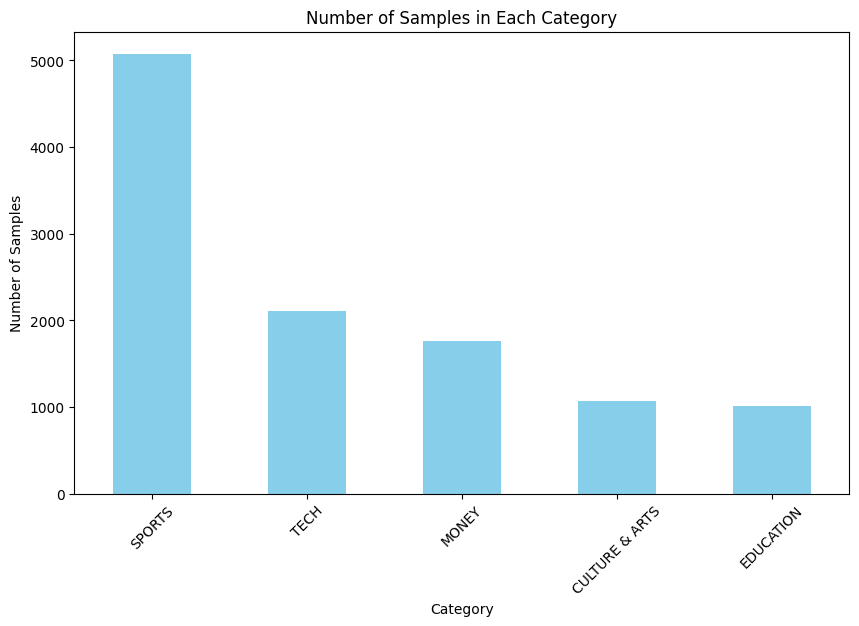

In [ ]:
import matplotlib.pyplot as plt

# Count the number of samples in each category
category_counts = data['category'].value_counts()

# Plot the bar graph
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Samples in Each Category')
plt.xlabel('Category')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45)
plt.show()

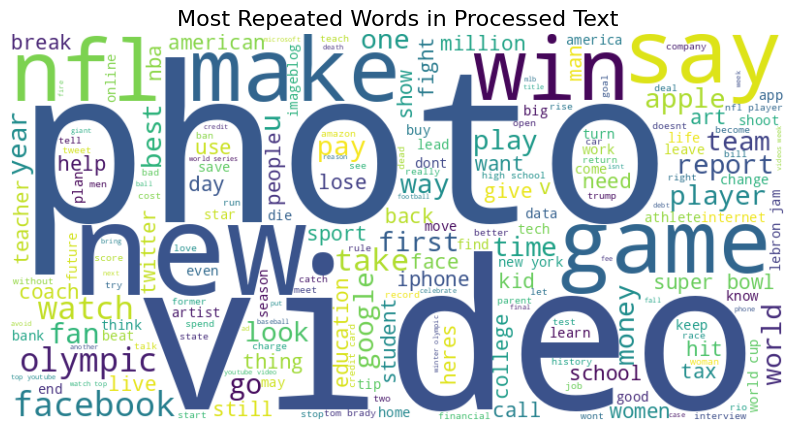

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all processed text into a single string
all_text = " ".join(data['processed_text'].dropna())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Repeated Words in Processed Text", fontsize=16)
plt.show()

## Train Test Split

In [ ]:
from sklearn.preprocessing import LabelEncoder

X = data['processed_text'].values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['category'].values)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
# Get label mapping
label_mapping = {index: label for index, label in enumerate(label_encoder.classes_)}
print(label_mapping)

{0: 'CULTURE & ARTS', 1: 'EDUCATION', 2: 'MONEY', 3: 'SPORTS', 4: 'TECH'}


In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape, X_val.shape, y_val.shape

((7056,), (2205,), (7056,), (2205,), (1764,), (1764,))

## Tokenize cleaned dataset

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
# Sample Headline
tokenizer = Tokenizer(num_words=10831, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train) # Vocabulary based ONLY on training data
# Use the same tokenizer to transform both sets
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_val_seq = tokenizer.texts_to_sequences(X_val)

### 95th Percentile to avoid padding long sequences

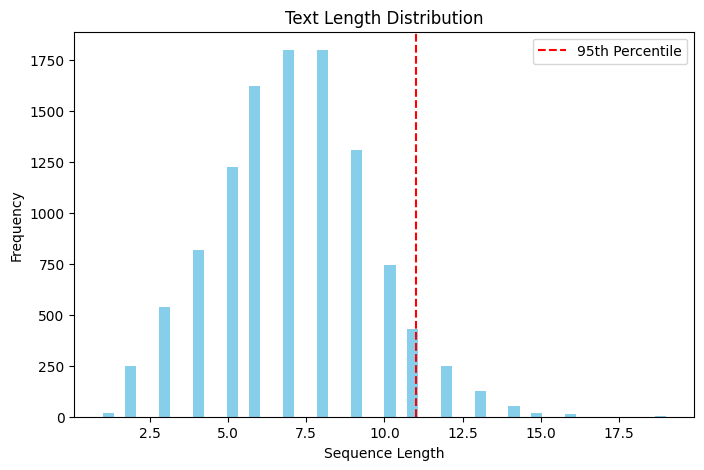

In [ ]:
X_seq = tokenizer.texts_to_sequences(data['processed_text'])
seq_lengths = [len(seq) for seq in X_seq]
plt.figure(figsize=(8, 5))
plt.hist(seq_lengths, bins=50, color='skyblue')
plt.title('Text Length Distribution')
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.axvline(np.percentile(seq_lengths, 95), color='red', linestyle='dashed', label='95th Percentile'
)
plt.legend()
plt.show()

In [ ]:
max_len = max(len(seq) for seq in X_train_seq) # Longest sequence in training data
max_len

19

In [ ]:
import numpy as np
# Calculate max_len using percentile
seq_lengths = [len(seq) for seq in X_train_seq]
max_len = int(np.percentile(seq_lengths, 95)) # Adjust percentile as needed
# Pad sequences
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post', truncating='post')
X_val_pad = pad_sequences(X_val_seq, maxlen=max_len, padding='post', truncating='post')

## Gensim Word2Vec with Google News vectors negative 300

In [ ]:
import numpy as np
from gensim.models import KeyedVectors
# Load the pre-trained Word2Vec model (e.g., Google's Word2Vec)
word2vec_model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)
# Initialize the embedding matrix with zeros (vocab_size, embedding_dim)
vocab_size = len(tokenizer.word_index) + 1 # Add 1 for padding
w2v_embedding_dim = 300 # Word2Vec uses 300-dimensional vectors
w2v_embedding_matrix = np.zeros((vocab_size, w2v_embedding_dim))
# Map each word in the tokenizer's word index to its Word2Vec vector
for word, index in tokenizer.word_index.items():
  if word in word2vec_model:
    w2v_embedding_matrix[index] = word2vec_model[word]

In [ ]:

# Check the shape of the embedding matrix
print("Word2Vec Embedding Matrix Shape:", w2v_embedding_matrix.shape)

Word2Vec Embedding Matrix Shape: (10831, 300)


In [ ]:
# Initialize the embedding matrix with zeros (vocab_size, embedding_dim)
vocab_size = len(tokenizer.word_index) + 1 # Add 1 for padding
embedding_dim = 128
embedding_matrix = np.zeros((vocab_size, embedding_dim))
print(embedding_matrix.shape)

(10831, 128)


## Build Model

In [ ]:
callbacks = [EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)]

In [ ]:
model_rnn = Sequential([
    Embedding(input_dim=10831, output_dim=300, input_length=max_len),
    SimpleRNN(300, dropout=0.2),
    # Dense layer
    Dense(len(np.unique(y)), activation='softmax')
])
model_rnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:

# Model 2: LSTM
model_lstm = Sequential([
    Embedding(input_dim=10831, output_dim=128, input_length=max_len, weights=[embedding_matrix], trainable=True),
    # LSTM layer
    LSTM(128, dropout=0.2, recurrent_dropout=0.2, return_sequences=True),
    LSTM(64, dropout=0.2, recurrent_dropout=0.2),
    # Dense layer
    Dense(len(np.unique(y)), activation='softmax')
])
model_lstm.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:

# Model 3: LSTM with Word2Vec
model_lstm2 = Sequential([
    Embedding(input_dim=10831, output_dim=300, input_length=max_len, weights=[w2v_embedding_matrix], trainable=True),
    # LSTM layer
    LSTM(300, dropout=0.2, recurrent_dropout=0.2, return_sequences=True),
    LSTM(64, dropout=0.2, recurrent_dropout=0.2),
    # Dense layer
    Dense(len(np.unique(y)), activation='softmax')
])
model_lstm2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/home/sanil/py3.11-tensorflow/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Compute class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights = dict(enumerate(class_weights))

def train_and_evaluate(model, X_train, y_train, X_test, y_test, model_name):
    history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), callbacks=callbacks, class_weight=class_weights)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title(f'{model_name} Accuracy')
    plt.legend()
    plt.show()

    y_pred = np.argmax(model.predict(X_test), axis=1)
    print(f'{model_name} Classification Report:\n', classification_report(y_test, y_pred))
    print(f'{model_name} Confusion Matrix:\n', confusion_matrix(y_test, y_pred))



## Train and Evaluate Models

Epoch 1/10
221/221 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.5091 - loss: 1.3038 - val_accuracy: 0.7542 - val_loss: 0.7158
Epoch 2/10
221/221 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9090 - loss: 0.3257 - val_accuracy: 0.7669 - val_loss: 0.7275
Epoch 3/10
221/221 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9720 - loss: 0.1071 - val_accuracy: 0.7338 - val_loss: 0.9725
Epoch 4/10
221/221 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9791 - loss: 0.0722 - val_accuracy: 0.7542 - val_loss: 1.0472


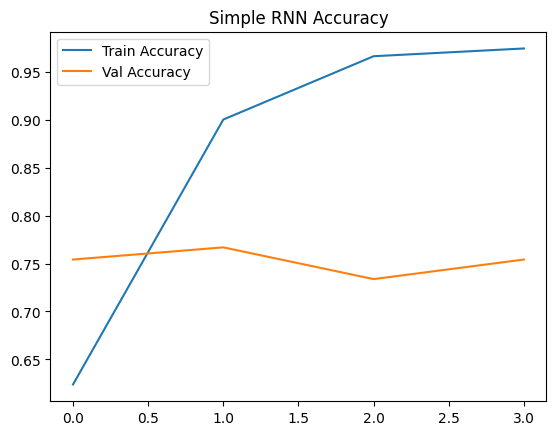

69/69 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step
Simple RNN Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.63      0.64       224
           1       0.35      0.87      0.50       193
           2       0.76      0.53      0.62       338
           3       0.93      0.90      0.91      1020
           4       0.89      0.61      0.72       430

    accuracy                           0.75      2205
   macro avg       0.72      0.71      0.68      2205
weighted avg       0.82      0.75      0.77      2205

Simple RNN Confusion Matrix:
 [[142  44  13  18   7]
 [  7 167  11   5   3]
 [  8 125 178  14  13]
 [ 29  55  13 915   8]
 [ 36  84  20  29 261]]


In [ ]:

train_and_evaluate(model_rnn, X_train_pad, y_train, X_test_pad, y_test, 'Simple RNN')


Epoch 1/10
221/221 ━━━━━━━━━━━━━━━━━━━━ 71s 268ms/step - accuracy: 0.4296 - loss: 1.3719 - val_accuracy: 0.7855 - val_loss: 0.6616
Epoch 2/10
221/221 ━━━━━━━━━━━━━━━━━━━━ 58s 264ms/step - accuracy: 0.8855 - loss: 0.4064 - val_accuracy: 0.8367 - val_loss: 0.5161
Epoch 3/10
221/221 ━━━━━━━━━━━━━━━━━━━━ 57s 257ms/step - accuracy: 0.9692 - loss: 0.1305 - val_accuracy: 0.8281 - val_loss: 0.6033
Epoch 4/10
221/221 ━━━━━━━━━━━━━━━━━━━━ 58s 262ms/step - accuracy: 0.9841 - loss: 0.0620 - val_accuracy: 0.8236 - val_loss: 0.7032
Epoch 5/10
221/221 ━━━━━━━━━━━━━━━━━━━━ 58s 263ms/step - accuracy: 0.9891 - loss: 0.0478 - val_accuracy: 0.8281 - val_loss: 0.7677


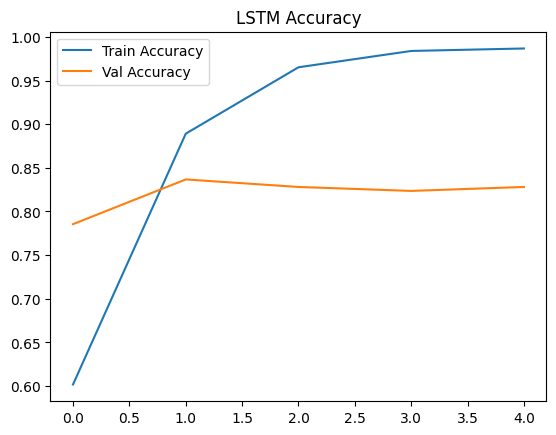

69/69 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step
LSTM Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.73      0.73       224
           1       0.68      0.69      0.69       193
           2       0.79      0.75      0.77       338
           3       0.94      0.92      0.93      1020
           4       0.75      0.83      0.79       430

    accuracy                           0.84      2205
   macro avg       0.78      0.78      0.78      2205
weighted avg       0.84      0.84      0.84      2205

LSTM Confusion Matrix:
 [[163   9  15  11  26]
 [ 11 133  18   6  25]
 [ 11  24 253  12  38]
 [ 24  12  16 939  29]
 [ 11  17  19  26 357]]


In [ ]:
train_and_evaluate(model_lstm, X_train_pad, y_train, X_test_pad, y_test, 'LSTM')

Epoch 1/10
221/221 ━━━━━━━━━━━━━━━━━━━━ 67s 284ms/step - accuracy: 0.6946 - loss: 0.9210 - val_accuracy: 0.8594 - val_loss: 0.4327
Epoch 2/10
221/221 ━━━━━━━━━━━━━━━━━━━━ 61s 274ms/step - accuracy: 0.8996 - loss: 0.3481 - val_accuracy: 0.8168 - val_loss: 0.5580
Epoch 3/10
221/221 ━━━━━━━━━━━━━━━━━━━━ 60s 272ms/step - accuracy: 0.9502 - loss: 0.1753 - val_accuracy: 0.8458 - val_loss: 0.5728
Epoch 4/10
221/221 ━━━━━━━━━━━━━━━━━━━━ 63s 285ms/step - accuracy: 0.9709 - loss: 0.1069 - val_accuracy: 0.8531 - val_loss: 0.5767


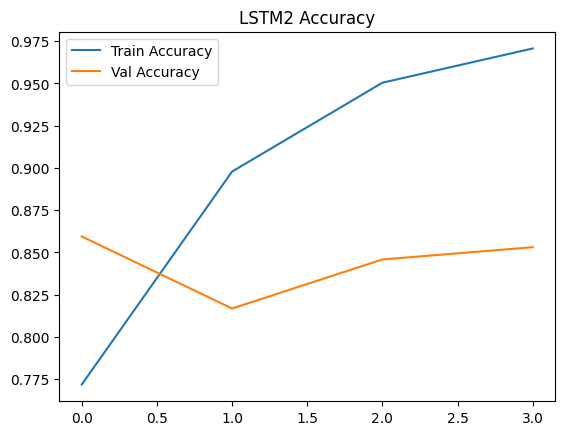

69/69 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step
LSTM2 Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.79      0.78       224
           1       0.67      0.76      0.72       193
           2       0.79      0.82      0.80       338
           3       0.94      0.94      0.94      1020
           4       0.88      0.77      0.82       430

    accuracy                           0.86      2205
   macro avg       0.81      0.82      0.81      2205
weighted avg       0.86      0.86      0.86      2205

LSTM2 Confusion Matrix:
 [[178  10  15  12   9]
 [ 16 147  11  10   9]
 [  4  25 277  18  14]
 [ 18  12  15 962  13]
 [ 17  24  34  24 331]]


In [ ]:
train_and_evaluate(model_lstm2, X_train_pad, y_train, X_test_pad, y_test, 'LSTM2')


In [ ]:
# Save the Simple RNN model
model_rnn.save('simple_rnn_model.h5')
print("Simple RNN model saved as 'simple_rnn_model.h5'")


Simple RNN model saved as 'simple_rnn_model.h5'


In [ ]:

# Save the LSTM model
model_lstm.save('lstm_model.h5')
print("LSTM model saved as 'lstm_model.h5'")


In [ ]:

# Save the LSTM with Word2Vec model
model_lstm2.save('lstm2_model.h5')
print("LSTM2 model saved as 'lstm2_model.h5'")

LSTM2 model saved as 'lstm2_model.h5'


In [ ]:
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Load the saved models
model_rnn = load_model('simple_rnn_model.h5')
model_lstm = load_model('lstm_model.h5')
model_lstm2 = load_model('lstm2_model.h5')

# Evaluate each model on the test data
def evaluate_model(model, X_test_pad, y_test, model_name):
    # Predict the test data
    y_pred = np.argmax(model.predict(X_test_pad), axis=1)

    # Print evaluation metrics
    print(f"Evaluation for {model_name}:")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\n")



In [ ]:
# Evaluate Simple RNN
evaluate_model(model_rnn, X_test_pad, y_test, "Simple RNN")


69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Evaluation for Simple RNN:
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.63      0.64       224
           1       0.35      0.87      0.50       193
           2       0.76      0.53      0.62       338
           3       0.93      0.90      0.91      1020
           4       0.89      0.61      0.72       430

    accuracy                           0.75      2205
   macro avg       0.72      0.71      0.68      2205
weighted avg       0.82      0.75      0.77      2205

Confusion Matrix:
[[142  44  13  18   7]
 [  7 167  11   5   3]
 [  8 125 178  14  13]
 [ 29  55  13 915   8]
 [ 36  84  20  29 261]]




In [ ]:

# Evaluate LSTM
evaluate_model(model_lstm, X_test_pad, y_test, "LSTM")


69/69 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step
Evaluation for LSTM:
Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.82      0.65       224
           1       0.50      0.74      0.60       193
           2       0.83      0.65      0.73       338
           3       0.92      0.91      0.91      1020
           4       0.88      0.63      0.74       430

    accuracy                           0.79      2205
   macro avg       0.73      0.75      0.73      2205
weighted avg       0.82      0.79      0.80      2205

Confusion Matrix:
[[184  15   6  15   4]
 [ 19 143   5  23   3]
 [ 29  63 220  14  12]
 [ 63  14   0 924  19]
 [ 48  49  35  26 272]]




In [ ]:

# Evaluate LSTM with Word2Vec
evaluate_model(model_lstm2, X_test_pad, y_test, "LSTM with Word2Vec")

69/69 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step
Evaluation for LSTM with Word2Vec:
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.79      0.78       224
           1       0.67      0.76      0.72       193
           2       0.79      0.82      0.80       338
           3       0.94      0.94      0.94      1020
           4       0.88      0.77      0.82       430

    accuracy                           0.86      2205
   macro avg       0.81      0.82      0.81      2205
weighted avg       0.86      0.86      0.86      2205

Confusion Matrix:
[[178  10  15  12   9]
 [ 16 147  11  10   9]
 [  4  25 277  18  14]
 [ 18  12  15 962  13]
 [ 17  24  34  24 331]]




In [ ]:
!pip install --upgrade gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 26.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 62.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 5.4 MB/s eta 0:00:00


In [ ]:
import gradio as gr
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load the trained models
model_rnn = load_model('/content/simple_rnn_model.h5')
model_lstm = load_model('/content/lstm_model.h5')
model_lstm2 = load_model('/content/lstm2_model.h5')

# Load tokenizer and max_len (ensure these are consistent with training)
# Ensure max_len is properly set
max_len = 19  # Replace with the actual max_len used during training

# Ensure tokenizer is properly initialized
tokenizer = Tokenizer(num_words=10831, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)  # Ensure this matches the training process

# Ensure label_mapping is properly initialized
label_mapping = {index: label for index, label in enumerate(label_encoder.classes_)}

# Function to preprocess the input headline
def preprocess_headline(headline):
    if not headline.strip():
        return None
    # Tokenize and pad the input headline
    headline_seq = tokenizer.texts_to_sequences([headline])
    headline_pad = pad_sequences(headline_seq, maxlen=max_len, padding='post', truncating='post')
    return headline_pad

# Function to predict sentiment using the selected model
def predict_sentiment(headline, model_choice):
    if not headline.strip():
        return "Please enter a headline for prediction!"

    # Preprocess the headline
    headline_pad = preprocess_headline(headline)
    if headline_pad is None:
        return "Invalid input headline!"

    # Select the model
    if model_choice == "Simple RNN":
        model = model_rnn
    elif model_choice == "LSTM":
        model = model_lstm
    elif model_choice == "LSTM with Word2Vec":
        model = model_lstm2
    else:
        return "Invalid model choice!"

    # Make prediction
    prediction = model.predict(headline_pad)
    predicted_class = np.argmax(prediction, axis=1)[0]

    # Map the predicted class to the category
    return f"Predicted Category: {label_mapping.get(predicted_class, 'Unknown')}"

# Create Gradio Interface
iface = gr.Interface(
    fn=predict_sentiment,
    inputs=[
        gr.Textbox(lines=5, placeholder="Enter a headline here...", label="headline"),
        gr.Radio(["Simple RNN", "LSTM", "LSTM with Word2Vec"], label="Model Choice")
    ],
    outputs="text",
    title="headline Category Predictor",
    description="Enter a headline and select a model to predict its category.",
    theme="default"
)

iface.launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://9c4d87b64ca47f813b.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
